# Youngs Modulus Prediction# 

In [258]:
# Loading the packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
# Loading the data
data = pd.read_csv("Final_Youngs_Data3.csv")
data = data.iloc[:,1:data.shape[1]]
colnames = data.columns[1:data.shape[1]-1]
print(colnames)

Index(['Diff. Lattice Constants', 'Diff. Melting Point', 'Mixing Enthalpy',
       'Lattice Constants', 'Lambda', 'Diff. in atomic radii', 'Omega',
       'Melting Temp.', 'Diff. Electronegativity', 'Mixing Entropy',
       'Valence electron'],
      dtype='object')


In [260]:
data.head()

,Alloy,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,Young's Mod (GPa)
0,Al0.5CoCrCuFeNi,0.487880,346.087653,-4.853717,3.172259,0.845568,4.169229,5126.805332,1693.017839,0.109326,14.698051,8.27281,161.1
1,Al0.3CoCrFeNi,0.449913,295.639150,-9.931969,3.028509,0.908382,3.757616,2332.647391,1806.304922,0.107517,12.826063,7.88379,168.0
2,Al0.5CrCuFeNi2,0.381975,344.853267,-5.856117,3.357152,0.714539,4.199646,3627.716399,1685.745039,0.113094,12.602340,8.45463,172.1
3,CoCrFeNi,0.365443,180.372358,-3.714500,2.951900,126.282311,0.302116,5808.140599,1871.750000,0.096695,11.526293,8.25000,173.9
4,NiCoCr,0.418117,204.299411,-5.025233,2.980337,337.314135,0.164559,3439.052841,1891.981080,0.111454,9.134363,8.33325,174.4


## Pre Processing the data ##
Here we split the data into train and test set and standardized the data.

In [261]:
# Separating data
X = data.iloc[:,1:12]
Y = data.iloc[:,-1]


# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X))
scaled_X_train.columns = colnames
scaled_X_train.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,-0.029563,-0.499609,0.302322,-0.349550,-0.220666,-0.267405,-0.238827,-0.994176,-0.741745,1.082574,1.157456
1,-0.087909,-0.818931,-0.392714,-0.712111,-0.219546,-0.500639,-0.308797,-0.730046,-0.761031,0.098474,0.932849
2,-0.192313,-0.507422,0.165128,0.116780,-0.223001,-0.250170,-0.276367,-1.011133,-0.701576,-0.019137,1.262433
3,-0.217718,-1.548533,0.458241,-0.905331,2.014996,-2.458644,-0.221766,-0.577459,-0.876405,-0.584813,1.144286
4,-0.136771,-1.397082,0.278847,-0.833609,5.776221,-2.536589,-0.281091,-0.530290,-0.719053,-1.842247,1.192352


In [262]:
# reading test data
test = pd.read_csv("Validation_set_features.csv")
X_test = test.iloc[:,2:13]
Y_test = test.iloc[:,-1]
# Standardizing the test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test))
scaled_X_test.columns = colnames
scaled_X_test.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,-0.692392,-1.233629,0.636909,-0.381237,73.597311,-2.611005,-0.229855,1.794416,0.709336,-4.239716,-0.270148
1,-0.647892,-0.762253,0.572431,-0.375950,81.572424,-2.609836,-0.224117,1.770710,0.850297,-3.638857,-0.292723
2,-0.677011,-0.936193,0.622644,-0.378833,91.727086,-2.611445,-0.209859,1.834217,0.753582,-3.787400,-0.271920
3,-0.675170,-0.794814,0.600664,-0.376136,91.431731,-2.610454,-0.203012,1.853170,0.851528,-3.481454,-0.279790
4,-0.668131,-0.491842,0.571464,-0.369424,105.915688,-2.610409,-0.188365,1.927548,0.955381,-2.964744,-0.282798


## Gradient Boosting Regression ##


In [263]:
# Defining the parameters
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
# Training the gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(**params, random_state = 1)
gbr.fit(scaled_X_train,Y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [264]:
# crossvalidating
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

cv_error = cross_val_score(gbr,scaled_X_train,Y,cv = 5, scoring = 'neg_mean_absolute_error')
print("The cross validated test score for the training data set is :",round(np.mean(cv_error),4))

The cross validated test score for the training data set is : -27.4568


In [265]:
# predicting for test set
pred = gbr.predict(scaled_X_test)
error = mean_absolute_error(Y_test,pred)
print("The Mean Absolute Error for the Test set is :", error)

The Mean Absolute Error for the Test set is : 25.734776116831778


In [266]:
# Grid Search For Hypermparameter Optimization

from sklearn.model_selection import GridSearchCV

# Defining the grid values
grid_value = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# Redefining the regressor
reg = GradientBoostingRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y)

In [252]:
print('Best parameter:',clf.best_params_)
print('Best Score:',clf.best_score_)

Best parameter: {'learning_rate': 0.2, 'n_estimators': 100}
Best Score: -42.46704086996602


In [253]:
# Creating the optimized parameter
opt_gbr = GradientBoostingRegressor(**clf.best_params_,random_state = 1)
opt_gbr.fit(scaled_X_train,Y)

# Predicting the results for the test set
test_pred = opt_gbr.predict(scaled_X_test)

#error
test_error = mean_absolute_error(Y_test,test_pred)
print("The test error is:",test_error)

The test error is: 25.670387401676397


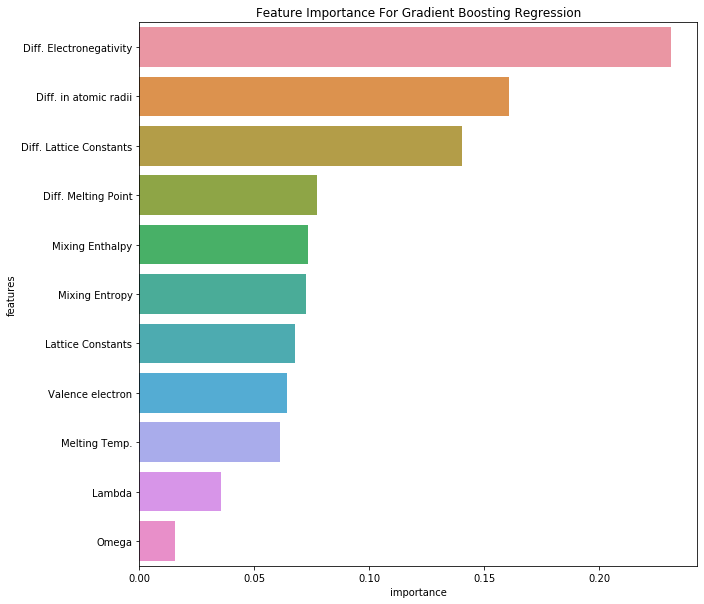

In [243]:
# Feature Importance
importance = list(opt_gbr.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)

# Visualization
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])
plt.title("Feature Importance For Gradient Boosting Regression")
plt.show()

## ADABOOST Regression ##

In [195]:
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(**params, random_state=1)

from sklearn.model_selection import cross_val_score
cv_error = cross_val_score(ada_reg, scaled_X_train, Y, cv = 10, scoring = 'neg_mean_absolute_error')
print("The cross validation errors is: ", cv_error)
print("Average Cross Validation Error: ", round(np.mean(cv_error),3))

The cross validation errors is:  [ -40.950524    -30.76646501  -44.96677546  -43.77142043 -129.50329542
  -57.20856931  -20.7804171   -25.8640996   -27.39386352  -19.01805023]
Average Cross Validation Error:  -44.022


In [196]:
# Fitting the model
ada_reg.fit(scaled_X_train,Y)

# Prediction for the test set
test_pred = ada_reg.predict(scaled_X_test)

# Error for prediction
from sklearn.metrics import mean_absolute_error
test_error = mean_absolute_error(Y_test,test_pred)
print("The Mean Absolute Error for test set is: ", test_error)

The Mean Absolute Error for test set is:  57.040250851435246


In [197]:
# Grid Search 
grid_value = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

from sklearn.model_selection import GridSearchCV
# Redefining the regressor
reg = AdaBoostRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [198]:
print("Best Parameters: ",clf.best_params_)
print("Best Score: ", clf.best_score_)

Best Parameters:  {'learning_rate': 0.8, 'n_estimators': 300}
Best Score:  -44.35070990812962


In [199]:
# Training the optimized model
opt_ada_reg = AdaBoostRegressor(**clf.best_params_, random_state = 1)
opt_ada_reg.fit(scaled_X_train,Y)

# Predicting the result for test set
opt_test_pred = opt_ada_reg.predict(scaled_X_test)

# Error rate
opt_error = mean_absolute_error(Y_test, opt_test_pred)
print("Test set error for optimized parameters: ", round(opt_error,3))

Test set error for optimized parameters:  50.381


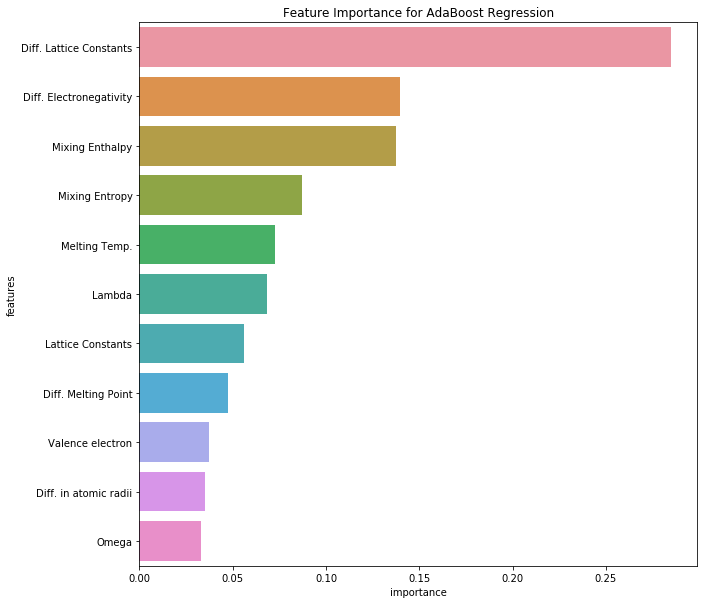

In [200]:
# Feature Importance 
importance = list(opt_ada_reg.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)

# Visualization
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])
plt.title("Feature Importance for AdaBoost Regression")
plt.show()

## XGBOOST Regression ##

In [201]:
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(**params, random_state=1)

from sklearn.model_selection import cross_val_score
cv_error = cross_val_score(xgb_reg, scaled_X_train, Y, cv = 5, scoring = 'neg_mean_absolute_error')
print("The cross validation errors is: ", cv_error)
print("Average Cross Validation Error: ", round(np.mean(cv_error),3))

The cross validation errors is:  [-45.84392946 -45.07542096 -86.28401431 -31.66901304 -22.16469357]
Average Cross Validation Error:  -46.207


In [202]:
# Fitting the model
xgb_reg.fit(scaled_X_train,Y)

# Prediction for the test set
test_pred = xgb_reg.predict(scaled_X_test)

# Error for prediction
from sklearn.metrics import mean_absolute_error
test_error = mean_absolute_error(Y_test,test_pred)
print("The Mean Absolute Error for test set is: ", test_error) 

The Mean Absolute Error for test set is:  16.569212341308596


In [203]:
# Grid Search 
grid_value = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

from sklearn.model_selection import GridSearchCV
# Redefining the regressor
reg = xgb.XGBRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid

In [204]:
print("Best Parameters: ",clf.best_params_)
print("Best Score: ", clf.best_score_)

Best Parameters:  {'learning_rate': 0.3, 'n_estimators': 100}
Best Score:  -43.884681450643725


In [205]:
# Training the optimized model
opt_xgb_reg = xgb.XGBRegressor(**clf.best_params_, random_state = 1)
opt_xgb_reg.fit(scaled_X_train,Y)

# Predicting the result for test set
opt_test_pred = opt_xgb_reg.predict(scaled_X_test)

# Error rate
opt_error = mean_absolute_error(Y_test, opt_test_pred)
print("Test set error for optimized parameters: ", round(opt_error,3))

Test set error for optimized parameters:  34.342


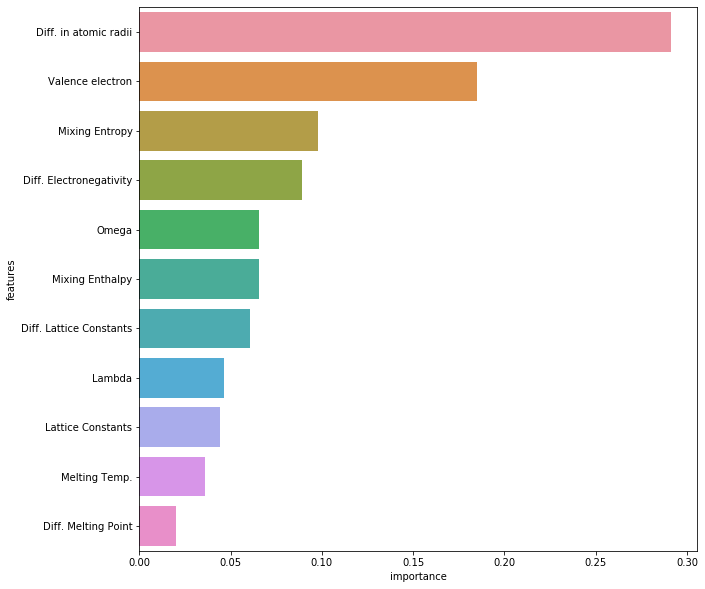

In [206]:
# Feature Importance 
importance = list(opt_xgb_reg.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])